In [1]:
# 1. Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 2. Đọc dữ liệu
file_path = 'C:/Users/acer/OneDrive - Trường ĐH CNTT - University of Information Technology/NCKH/Machine Learning_Python/Data/diabetes.csv'
data = pd.read_csv(file_path)

In [3]:
# 3. Tách biến đầu vào (X) và biến mục tiêu (y)
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]
y = data['Outcome']

In [4]:
# 4. Chia dữ liệu: 80% Train - 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 5. CHUẨN HÓA DỮ LIỆU (Bắt buộc với SVM)
# SVM dựa trên khoảng cách, nếu không chuẩn hóa (Scale), biến có giá trị lớn (như Insulin) 
# sẽ lấn át các biến nhỏ, làm sai lệch mô hình.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# 6. Huấn luyện mô hình SVM
# kernel='linear': Dùng đường thẳng để chia (Giống file Excel của bạn)
# C=1.0: Tham số điều chỉnh độ "cứng" của lề đường (Margin). 
# C càng lớn thì càng phạt nặng lỗi sai, C nhỏ thì chấp nhận sai số để lề đường rộng hơn.
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
# 7. Dự đoán
y_pred = model.predict(X_test_scaled)

In [8]:
# 8. --- SO SÁNH VỚI EXCEL ---
# Lấy ra các hệ số w (Weights) và Bias
print("--- CÁC HỆ SỐ CỦA MẶT PHẲNG PHÂN CÁCH (HYPERPLANE) ---")
print(f"Bias (Hệ số chặn): {model.intercept_[0]:.4f}")
print("Trọng số (Weights - w):")
weights_df = pd.DataFrame(model.coef_, columns=feature_cols)
print(weights_df.T) # In dạng cột cho dễ nhìn

--- CÁC HỆ SỐ CỦA MẶT PHẲNG PHÂN CÁCH (HYPERPLANE) ---
Bias (Hệ số chặn): -0.6722
Trọng số (Weights - w):
                                 0
Pregnancies               0.183419
Glucose                   0.891469
BloodPressure            -0.223532
SkinThickness            -0.014300
Insulin                  -0.147337
BMI                       0.552647
DiabetesPedigreeFunction  0.146234
Age                       0.288488


In [9]:
# 9. Đánh giá kết quả
print("\n--- KẾT QUẢ ĐÁNH GIÁ ---")
acc = accuracy_score(y_test, y_pred)
print(f"Độ chính xác (Accuracy): {acc*100:.2f}%")
print(classification_report(y_test, y_pred))


--- KẾT QUẢ ĐÁNH GIÁ ---
Độ chính xác (Accuracy): 75.97%
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



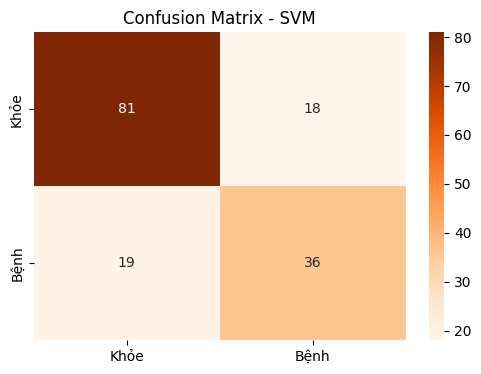

In [10]:
# 10. Vẽ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Khỏe', 'Bệnh'], yticklabels=['Khỏe', 'Bệnh'])
plt.title('Confusion Matrix - SVM')
plt.show()